In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Loading Training and Test data sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Number of Classes
Ntr = x_train.shape[0]      # Number of Training examples
Nte = x_test.shape[0]       # Number of Testing examples
Din = 3072                  # CIFAR10 (Size of an example)

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0

# Subtract the means of images to make the network less sensitive to differing background and lightening conditions.
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

# Obtaining a binary numpy array from y_train and y_test
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

# Reshape image arrays from 32 x 32 x 3 into 1 x  3072
x_train = np.reshape(x_train,(Ntr,Din)).astype('float32')
x_test = np.reshape(x_test,(Nte,Din)).astype('float32')

170500096/170498071 [==============================] - 2s 0us/step
x_train:  (50000, 32, 32, 3)


In [4]:
H = 200                               # Number of hidden nodes
std=1e-5                              # Standard deviation
w1 = std*np.random.randn(Din, H)      # Weights 1 matrix
w2 = std*np.random.randn(H, K)        # Weights 2 matrix
b1 = np.zeros(H)                      # Bias 1 vector
b2 = np.zeros(K)                      # Bias 2 vector
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w1.shape)
print("b2:", b1.shape)

batch_size = 500                    # Batch size

iterations = 5000                   # Number of iterations to run Gradient Descent (For this case it equals to 300 epochs)
alpha = 1.5e-2                        # Learning Rate
alpha_decay= 0.999                  # Decay learning rate for convergence
Lambda = 5e-6                       # Regularization rate

loss_history = []                   # Loss history
train_acc_history = []              # Traing accuracy history

for t in range(iterations):
    indices = np.random.choice(x_train.shape[0], batch_size, replace=False) 
    # Forward pass
    x = x_train[indices]
    y = y_train[indices]
    h = 1.0/(1.0+np.exp(-(x.dot(w1) + b1)))
    y_pred = h.dot(w2) + b2
    loss = (1./batch_size)*(np.square(y_pred - y).sum()) + Lambda * (np.sum(w1 * w1) + np.sum(w1 * w1))
    loss_history.append(loss)

    # Printing Loss in each 10 iterations
    if t % 10 == 0:
        print('iteration %d / %d: loss %f ' %(t, iterations, loss))

    # Backward pass
    dy_pred = (1./batch_size)*2.0*(y_pred - y)              # PD of loss w.r.t. y_pred
    dw2 = h.T.dot(dy_pred) + Lambda * w2                    # PD of loss w.r.t. w2
    db2 = dy_pred.sum(axis = 0)                             # PD of loss w.r.t. b2
    dh = dy_pred.dot(w2.T)                                  # PD of loss w.r.t. h
    dw1 = x.T.dot(dh*h*(1-h)) + Lambda * w1                 # PD of loss w.r.t. w1 
    db1 = (dh*h*(1-h)).sum(axis = 0)                        # PD of loss w.r.t. b1
    w2 -= alpha * dw2                                       # Update weights 2
    b2 -= alpha * db2                                       # Update biases 2
    w1 -= alpha * dw1                                       # Update weights 1
    b1 -= alpha * db1                                       # Update biases 1
    alpha *= alpha_decay                                    # Decay learning rate

    # Appending Train accuracy to history
    h = 1.0/(1.0 + np.exp(-(x.dot(w1)+b1)))
    y_pred = h.dot(w2) + b2
    train_acc = 1.0 - 1/(Ntr*9)*(np.abs(np.argmax(y, axis = 1) - np.argmax(y_pred, axis = 1))).sum()
    train_acc_history.append(train_acc)

w1: (3072, 200)
b1: (200,)
w2: (3072, 200)
b2: (200,)
iteration 0 / 5000: loss 1.000041 
iteration 10 / 5000: loss 0.873075 
iteration 20 / 5000: loss 0.845695 
iteration 30 / 5000: loss 0.836887 
iteration 40 / 5000: loss 0.826940 
iteration 50 / 5000: loss 0.819518 
iteration 60 / 5000: loss 0.801461 
iteration 70 / 5000: loss 0.797957 
iteration 80 / 5000: loss 0.815303 
iteration 90 / 5000: loss 0.783179 
iteration 100 / 5000: loss 0.783629 
iteration 110 / 5000: loss 0.794827 
iteration 120 / 5000: loss 0.785397 
iteration 130 / 5000: loss 0.798519 
iteration 140 / 5000: loss 0.789430 
iteration 150 / 5000: loss 0.786492 
iteration 160 / 5000: loss 0.752916 
iteration 170 / 5000: loss 0.775624 
iteration 180 / 5000: loss 0.791389 
iteration 190 / 5000: loss 0.762569 
iteration 200 / 5000: loss 0.752748 
iteration 210 / 5000: loss 0.776620 
iteration 220 / 5000: loss 0.777103 
iteration 230 / 5000: loss 0.767756 
iteration 240 / 5000: loss 0.768157 
iteration 250 / 5000: loss 0.769

train_acc =  0.8694333333333333
test_acc =  0.7833444444444444
test_loss =  0.7426716751401601


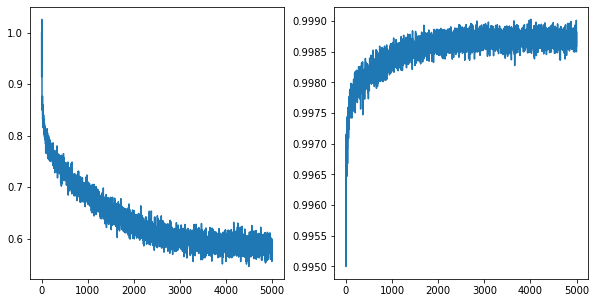

In [5]:
# Printing accuracies and losses

# History
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(loss_history)                # Training Loss History
ax[1].plot(train_acc_history)           # Training Accuracy History

# Calculating and Printing Training Accuracy
x_t = x_train
h = 1.0/(1.0+np.exp(-(x_t.dot(w1) + b1)))
y_pred = h.dot(w2) + b2
train_acc = 1.0 - 1/(Ntr*9)*(np.abs(np.argmax(y_train, axis = 1) - np.argmax(y_pred, axis = 1))).sum()
print("train_acc = ",train_acc)

# Calculating and Printing Testing Accuracy
x_t = x_test
h = 1.0/(1.0+np.exp(-(x_t.dot(w1) + b1)))
y_pred = h.dot(w2) + b2
test_acc =  1.0 - 1/(Nte*9)*(np.abs(np.argmax(y_test, axis = 1) - np.argmax(y_pred, axis = 1))).sum()
print("test_acc = ",test_acc)

# Testing Loss
test_loss = (1./Nte)*(np.square(y_pred - y_test).sum())
print("test_loss = ",test_loss)

Log (Experiment with Alpha)

alpha     tr_loss     te_loss      tr_acc     te_acc     ierations

2e-3      0.7411      0.7512       0.7815     0.7694     30000

5e-3      0.6682      0.7277       0.8225     0.7824     30000

5e-3      0.6817      0.7291       0.8219     0.7808     5000

1e-2      0.5941      0.7311       0.8555     0.7809     5000

1.6e-2    0.5830      0.7421       0.8637     0.7733     5000

1.5e-2    0.5744      0.7389       0.8684     0.7812     5000

1.4e-2    0.5741      0.7411       0.8684     0.7799     5000      